<a href="https://colab.research.google.com/github/ParthikB/encryption/blob/master/encryption_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm
import matplotlib.pyplot as plt

### Grabbing the Data

In [0]:
train = datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

test  = datasets.MNIST('', train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

## Creating the Dataset Tensor

In [0]:
BATCH_SIZE = 10
trainSet = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
testSet  = torch.utils.data.DataLoader(test,  batch_size=BATCH_SIZE, shuffle=True)

#### Viewing one Sample

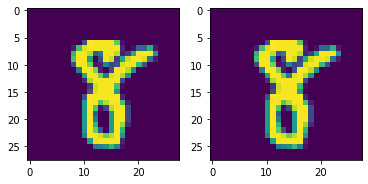

In [10]:
i = 0 # ranging from 0-9
for data in trainSet:
    # data --> one batch containing 32 samples
    x, y = data[0][i], data[1][i]

# print('Label :', y)
plt.subplot(1, 2, 1)
plt.imshow(x.view(28, 28)) # Reshaping x from (1, Height, Width) --> (Height, Width)

plt.subplot(1, 2, 2)
plt.imshow(x.view(28, 28))

In [15]:
trainSet

### Checking the Balancing of the Data

Text(0, 0.5, 'Percentage')

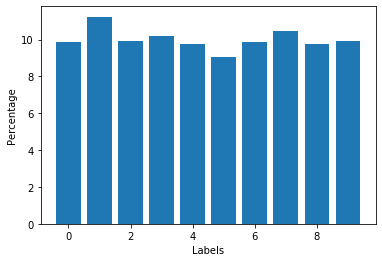

In [0]:
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainSet:
        y = data[1]
        for sample in y:
            counter[int(sample)] += 1
            total += 1
            
for key in counter:
    percentage = round(counter[key]/total * 100, 2)
    counter[key] = percentage

x = [key for key in counter]
y = [counter[key] for key in counter]
plt.bar(x, y)
plt.xlabel('Labels')
plt.ylabel('Percentage')

# The Data is BALANCED

## Creating the Network Structure

In [0]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64,    64)        
        self.fc3 = nn.Linear(64,    64)        
        self.fc4 = nn.Linear(64,    28*28)        
    
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))        
        x = F.sigmoid(self.fc3(x))        
        x = F.sigmoid(self.fc4(x))
        
        return x

## Training the Network

In [13]:
LEARNING_RATE = 0.001 #1e-3
EPOCHS        = 5

net = Net()

loss_function = nn.CrossEntropyLoss()
# Define Optimizer
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

loss_log = []
# Iteration Begins
for epoch in tqdm(range(EPOCHS)):
    # Iterate over every sample in the batch
    for data in tqdm(trainSet):
        x, y = data
        net.zero_grad()
        
        #Compute the output
        output = net(x.view(-1, 28*28))
        
        # Compute Loss
        loss = F.smooth_l1_loss(output, x.view(-1, 28*28))
        loss_log.append(loss)
        # Backpropagate
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
    # print(loss)

  0%|          | 0/6000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")

100%|██████████| 5/5 [02:07<00:00, 25.63s/it]


In [15]:
correct, total = 0, 0

with torch.no_grad():
    for data in trainSet:
        x, y = data
        output = net(x.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if i == x[idx].view(-1, 28*28):
                correct += 1
            total += 1
    trainAccuracy = round(correct/total *100, 2)
    
    for data in testSet:
        x, y = data
        output = net(x.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if i == x[idx].view(-1, 28*28):
                correct += 1
            total += 1
    testAccuracy = round(correct/total *100, 2)
    
print('Train Accuracy :', trainAccuracy, '%')
print('Test Accuracy  :', testAccuracy, '%')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


RuntimeError: ignored

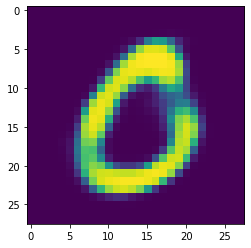

In [17]:
plt.imshow(i.view(28, 28))

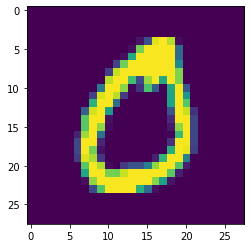

In [24]:
plt.imshow(x[0].view(28, 28))

In [0]:
import numpy as np
def mseLoss(x, y):
  return np.sum((np.abs(x.numpy() - y.numpy()**2)))/(28*28)

In [30]:
mseLoss(i.view(28, 28), x[0].view(28, 28))

0.05632155282156808